<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd

In [0]:
prayer_df = pd.read_csv('/content/prayer-sources.csv', 
                        # encoding="latin-1"
                        )
not_prayer_df = pd.read_csv('/content/not-prayer-sources.csv', 
# not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            # encoding="latin-1"
                            )

In [368]:
prayer_df.sample(5)

,Ref,En,He
375,Bereishit Rabbah 73:3,NaN,"פָּדָה בְשָׁלוֹם נַפְשִׁי מִקְּרָב לִי כִּי בְרַבִּים הָיוּ עִמָּדִי (תהלים נה, יט) , זֶה יַעֲקֹ..."
578,"Pri Tzadik, Noach 2:1",NaN,"בתנחומא אלה תולדות נח. יתברך שמו ממ""ה שבחר בישראל כו' ונתן לנו התורה כו' והאריך בשבח התורה שבעל ..."
312,"Sefat Emet, Genesis, Vayetzei 11:3",NaN,ויפגע במקום תיקן תפלת ערבית. ויקח מאבני המקום אבנים הם אותיות שהתעורר על ידי התפלה. שם אותם בראש...
741,II Samuel 22:7,"in my distress I called upon the Lord, and cried to my God: and he heard my voice out of his tem...",בַּצַּר־לִי֙ אֶקְרָ֣א יְהוָ֔ה וְאֶל־אֱלֹהַ֖י אֶקְרָ֑א וַיִּשְׁמַ֤ע מֵהֵֽיכָלוֹ֙ קוֹלִ֔י וְשַׁוְע...
20,Berakhot 31a:23,Daniel does not describe how these three prayers are distributed during the day. I might have th...,"יָכוֹל יְהֵא כּוֹלְלָן בְּבַת אַחַת — כְּבָר מְפוֹרָשׁ עַל יְדֵי דָּוִד, דִּכְתִיב: ״עֶרֶב וָבֹק..."


In [369]:
not_prayer_df.sample(5)

,Ref,En,He,Topics
480,Targum Jonathan on Ezekiel 33:17,NaN,וְיֵימְרוּן בְּנֵי עַמָךְ לָא מְפָרְשָׁן לָנָא אוֹרְחַת טוּבָא דַייָ וְאִינוּן אוֹרְחַתְהוֹן דִי...,explained
156,Sefer HaChinukh 602:1,"To not hold over deficient weights and measures: That we have been prevented, that we not hold o...","שלא להשהות משקלות ומדות חסרות - שנמנענו שלא להשהות את המשקלים והמאזנים החסרים בבתנו, ואף על פי ש...",laws-of-measures-and-weights
31,Chullin 101a:1,and Rabbi Shimon exempts him entirely.,ורבי שמעון פוטר,laws-of-the-prohibitions-of-eating-meat
83,Isaiah 33:15,"He that walketh righteously, and speaketh uprightly; He that despiseth the gain of oppressions, ...",הֹלֵ֣ךְ צְדָק֔וֹת וְדֹבֵ֖ר מֵֽישָׁרִ֑ים מֹאֵ֞ס בְּבֶ֣צַע מַעֲשַׁקּ֗וֹת נֹעֵ֤ר כַּפָּיו֙ מִתְּמֹ֣...,avodat-hashem
351,Likutei Moharan 2:4:2,"For charity &lt;is itself&gt; a product of mishpat, as in (Psalms 75:8), “The Lord is judge, He ...","כִּי צְדָקָה הוּא עַל יְדֵי מִשְׁפָּט, כְּמוֹ שֶׁכָּתוּב (שם עה): אֶלֹהִים שׁוֹפֵט, זֶה יַשְׁפִּ...",tzedakah


In [370]:
prayer_df['topic'] = 'prayer'
prayer_df = prayer_df[['En','topic']]
prayer_df.tail(3)

,En,topic
1049,"It is true that you are the one who judges, and reproves, who knows all, and bears witness, who ...",prayer
1050,"In these Berachot (blessings) we bow down: the first Beracha (blessing) [of Shemoneh Esreh], in ...",prayer
1051,On seeds he says [the Beracha (blessing)] Borei Minei Zerayim (Who created different types of se...,prayer


In [371]:
prayer_df.shape

(1052, 2)

In [372]:
not_prayer_df['topic'] = 'not_prayer'
not_prayer_df = not_prayer_df[['En','topic']]
not_prayer_df.tail(3)

,En,topic
1048,"אל תבקשו לטמאה בהם, do not search them out as they would confer spiritual contamination on you. ...",not_prayer
1049,who said to another: I am hereby selling to you all of the property that I own of the house of b...,not_prayer
1050,NaN,not_prayer


In [373]:
not_prayer_df.shape

(1051, 2)

In [420]:
all_prayer_frames = [prayer_df, not_prayer_df]
all_prayer_df = pd.concat(all_prayer_frames)
all_prayer_df.reset_index(inplace=True)
del all_prayer_df['index']

all_prayer_df.sample(5)
# all_prayer_df.loc[[1199]]


,En,topic
524,Rav Yehuda bar Sheila said that Rabbi Asi said that Rabbi Yoḥanan said: There are six matters a ...,prayer
758,"Then he turned his face to the wall, and prayed unto the LORD, saying: ’Remember now, O LORD, I ...",prayer
1058,NaN,not_prayer
811,NaN,prayer
329,NaN,prayer


In [376]:
all_prayer_df = all_prayer_df.apply(lambda x: x.astype(str).str.lower())
all_prayer_df.sample(5)

,En,topic
126,"rabbi shimon said: be careful with the reading of shema and the prayer, and when you pray, do no...",prayer
885,"speak unto the children of israel, and say unto them: when any man of you bringeth an offering u...",prayer
259,"ויעתר יצחק לנכח אשתו כי עקרה היא, “yitzchak prayed in the presence of his wife seeing she was ba...",prayer
881,"and it shall be for a sign unto thee upon thy hand, and for a memorial between thine eyes, that ...",prayer
188,abaye said to rava: in disputing rabbi tarfon’s opinion with regard to one who robbed money from...,not_prayer


In [377]:
print(all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print(all_prayer_df.shape)

(1247, 2)
(1221, 2)


In [375]:
all_prayer_df.dropna(inplace=True)
all_prayer_df.sample(5)

,En,topic
313,"Samuel hinted to Saul about these mysteries when he said to him: ""Even if you deem yourself ""sma...",not_prayer
311,The Gemara continues: And Rabbi Elazar says: When the baraita refers to the detachment of the sh...,not_prayer
385,"For there are true tzaddikim who have the power, through their occasional drinking of wine, to p...",not_prayer
527,We learned in the mishna that if they already began any one of the activities mentioned in the m...,prayer
573,And the mishna further taught that the Temple was destroyed for the second time also on the Nint...,not_prayer


In [378]:
all_prayer_df.isnull().sum()

En       0
topic    0
dtype: int64

In [379]:
all_prayer_df.sample(5)

,En,topic
35,and rav huna said that rav said in the name of rabbi meir: one’s words should always be few befo...,prayer
643,the gemara suggests: come and hear a resolution to the dilemma from that which is taught: a thie...,not_prayer
604,bileam may have something even more far-reaching in mind here. he perceived that because the jew...,prayer
591,rava sat in the study hall and said in the name of shmuel: if one wound the majority of the whit...,not_prayer
25,"rabbi ḥanina waited for him until he completed his prayer. when he finished, rabbi ḥanina asked ...",prayer


In [0]:
all_prayer_df['topic'] = all_prayer_df['topic'].map({'not_prayer': 0, 'prayer': 1})

In [408]:
all_prayer_df.sample(5)
all_prayer_df.loc[[91]]


,En,topic
91,"therefore pray not thou for this people, neither lift up cry nor prayer for them, neither make i...",1
91,a kabbalistic approach: the meaning of the words ממלכת כהנים is equivalent to writing ממלכת משרת...,0


In [382]:
nltk.download('stopwords')

import nltk
import string

from nltk.corpus import stopwords

whitelist = set('abcdefghijklmnopqrstuvwxyz ')

def process_text(text):
    '''
    1. Keep only letters and spaces
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    chars_str = ''.join(filter(whitelist.__contains__, text))
    
    #2
    clean_words = [word for word in chars_str.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [401]:
sample_text = '''aBC.!@#$%^&    c*(בחתו ‎‎‎ או‎ בקרחתו — une...
233 the gns: ac ...
1041    7. a pien p'''
process_text(sample_text)

['aBC', 'c', 'une', 'gns', 'ac', 'pien', 'p']

In [402]:
# all_prayer_df['En'].head().apply(process_text)
all_prayer_df['En'].apply(process_text)
all_prayer_df.head()

,En,topic
0,another of abba binyamin’s statements with regard to the laws of prayer was taught in a baraita ...,1
1,it was taught in a baraita that abba binyamin said: one’s prayer is only fully heard in a synago...,1
2,"additionally, ravin bar rav adda said that rabbi yitzḥak said: one who is accustomed to come to ...",1
3,"similarly, it was taught in a baraita that rabbi yishmael ben elisha, the high priest, said: onc...",1
4,"what is the meaning of that which is written: “but as for me, let my prayer be unto you, lord, i...",1


In [407]:
# all_prayer_df[id.loc==91]
all_prayer_df.loc[[91]]


,En,topic
91,"therefore pray not thou for this people, neither lift up cry nor prayer for them, neither make i...",1
91,a kabbalistic approach: the meaning of the words ממלכת כהנים is equivalent to writing ממלכת משרת...,0


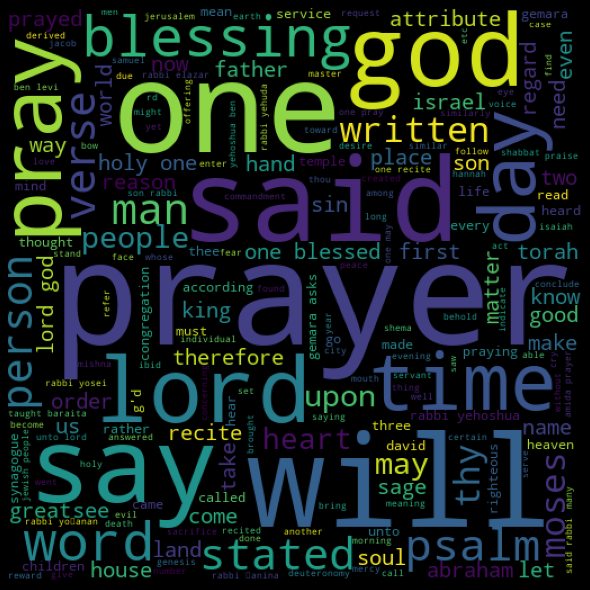

In [385]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 1]['En']))
prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

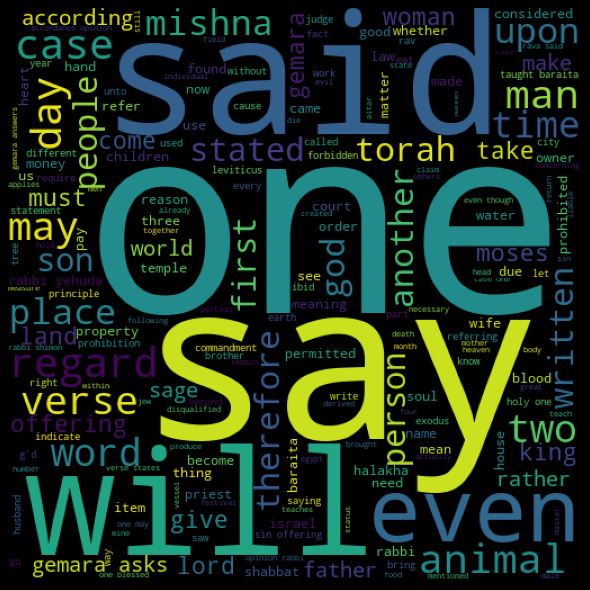

In [386]:
not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 0]['En']))
not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [387]:
X = all_prayer_df.En
y = all_prayer_df.topic
print(X.shape)
print(y.shape)

(1221,)
(1221,)


In [388]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(915,)
(306,)
(915,)
(306,)


In [389]:
# Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# vectorizer = CountVectorizer(analyzer=process_text)
# vectorizer = CountVectorizer(ngram_range=(2, 4))
# vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
vectorizer = TfidfVectorizer(ngram_range=(2, 4))
# vectorizer.fit(X_train)
# X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
X_train_dtm

# prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])

<915x284879 sparse matrix of type '<class 'numpy.float64'>'
	with 384484 stored elements in Compressed Sparse Row format>

In [390]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm


<306x284879 sparse matrix of type '<class 'numpy.float64'>'
	with 46968 stored elements in Compressed Sparse Row format>

In [391]:


from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB

classifier = MultinomialNB()
# classifier = ComplementNB()

# for Gaussian need array format
# X_train = X_train.toarray()
# X_test = X_test.toarray()
# classifier = GaussianNB()
# classifier = BernoulliNB()

%time classifier.fit(X_train_dtm, y_train)

# classifier.fit(X_train, y_train)


CPU times: user 20.1 ms, sys: 1.01 ms, total: 21.1 ms
Wall time: 21.1 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [392]:
y_pred_class = classifier.predict(X_test_dtm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8071895424836601

In [393]:
print(y_test.value_counts())
# print(y_test.value_counts()[0])


0    166
1    140
Name: topic, dtype: int64


In [394]:
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)


Null accuracy: 0    0.542484
Name: topic, dtype: float64


In [395]:
negs = y_test.value_counts()[0]
poss = y_test.value_counts()[1]
print('Manual null accuracy:',(1 / (1 + negs/poss)))


Manual null accuracy: 0.457516339869281


In [396]:
metrics.confusion_matrix(y_test, y_pred_class)


array([[123,  43],
       [ 16, 124]])

In [0]:

# # Evaluate the model on the training data set
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print("TRAINING")
# y_pred = classifier.predict(X_train)
# print(classification_report(y_train, y_pred))
# print('Confusion Matrix:\n',confusion_matrix(y_train, y_pred))
# print('\nAccuracy: ',accuracy_score(y_train, y_pred))

# print("\n\nTESTING")
# y_pred = classifier.predict(X_test)
# print(classification_report(y_test, y_pred))
# print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
# print('\nAccuracy: ',accuracy_score(y_test, y_pred))

In [0]:
TP = X_test[y_pred + y_test == 2]
TN = X_test[y_pred + y_test == 0]
FP = X_test[y_pred > y_test]
FN = X_test[y_pred < y_test]

In [0]:
pd.options.display.max_colwidth = 100

In [400]:
print("\n*** TP ***")
print(TP.sample(5))
print("\n*** TN ***")
print(TN.sample(5))
print("\n*** FP ***")
print(FP.sample(5))
print("\n*** FN ***")
print(FN.sample(5))


*** TP ***
397    prayer is thus a universal balm, good for all kinds of diseases and poisons, whether hot or cold...
121    it is related that rabbi elazar would first give a peruta to a poor person and only then would h...
396    for this reason the most fitting prayer is to ask the divine favor in general terms, and not in ...
207    although one is not bound to purchase a garment and wear it, so as to insert fringes therein, st...
27     continuing on the subject of prayer, the sages taught: there was an incident where one student d...
Name: En, dtype: object

*** TN ***
882    there are those who say that this discussion should be inverted, and in fact rabbi yoḥanan raise...
397    you say that this is the intent of the verse. but perhaps it is to liken this coming (i.e., your...
592    למען ילמד ליראה, in the philosophical, ethically instructive passages of the torah acquainting u...
251    ravina said: actually, it can be explained that rabbi yehuda is referring to judea. with 